In [1]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from prophet import Prophet

In [46]:
def merge_by_fecha(*dfs):
    """
    Merge multiple DataFrames on the 'Fecha' column.

    Parameters:
    *dfs: DataFrames to be merged

    Returns:
    Merged DataFrame
    """
    if not dfs:
        raise ValueError("At least one DataFrame must be provided.")
    
    return reduce(lambda left, right: pd.merge(left, right, on='Fecha', how='inner'), dfs)


In [47]:
df=pd.read_csv("construccion_inegi.csv")
df2=pd.read_csv("df_global.csv")

#df3=pd.read_csv("historico_cna.csv")
df3=pd.read_csv("historico_cna_corregido.csv")

df4=pd.read_csv("Precio_chatarra_mes_corregido.csv")
df5=pd.read_csv("ventas_canacero_final.csv")
df6=pd.read_csv("wBeamsPerfilesEstructurales.csv")
df7=pd.read_csv("slabBlackSea.csv")
df8=pd.read_csv("slabBrasil.csv")
df9=pd.read_csv("anglePerfilesComerciales.csv")
df10=pd.read_csv("hotRolledCoil.csv")
df11=pd.read_csv("platePlacaDeHoja.csv")

In [62]:
df_final=merge_by_fecha(df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11)
df_final

,Unnamed: 0_x,Fecha,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones,consumo_laminados_argentina,...,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES,wBeamsPerfilesEstructurales,slabBlackSea,slabBrasil,anglePerfilesComerciales,hotRolledCoil,platePlacaDeHoja
0,72,2018-01,-2.9,-3.5,44.4,-6.4,-5.0,-22.5,5.6,420.278833,...,994,175,11091,3079,36.0000,524.000,522.500,32.80,34.522500,36.0625
1,73,2018-02,-2.1,-4.7,-3.0,-5.1,1.7,-3.0,1.2,473.079833,...,753,143,9140,2669,37.5625,541.250,536.875,33.30,37.280000,40.2500
2,74,2018-03,1.2,3.2,12.8,0.6,-1.0,4.9,-1.6,447.157833,...,935,163,10238,3008,39.1250,577.500,572.500,33.80,41.834000,45.2000
3,75,2018-04,-4.3,-4.8,-8.9,-7.5,-2.3,2.4,-5.1,472.878833,...,835,148,8067,3560,42.0000,565.000,593.750,36.55,43.205000,47.0000
4,76,2018-05,5.2,6.9,4.7,0.0,3.3,-0.6,4.0,459.077833,...,939,124,12012,3641,42.0000,532.500,575.625,36.55,44.034000,46.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,139,2023-08,3.4,6.6,12.1,4.1,3.4,-5.5,-2.1,439.980586,...,2447,1099,10565,4513,64.7500,464.375,565.000,55.80,38.493913,74.9000
68,140,2023-09,2.0,1.2,9.2,8.4,4.6,3.1,2.8,400.744586,...,2784,1059,9989,4012,64.7500,494.125,545.000,55.80,33.954000,74.1250
69,141,2023-10,-1.4,0.6,-13.9,-6.4,-11.2,5.0,0.8,447.923076,...,3309,1350,10677,4261,64.7500,467.800,525.625,55.80,37.205000,71.1000
70,142,2023-11,-1.1,1.9,4.8,-1.9,0.8,-5.6,-0.8,407.267076,...,2986,1575,9848,4270,64.7500,469.375,587.500,55.80,46.221500,66.7500


In [51]:
df_numeric=df_final.drop(columns=[ 'Fecha','Unnamed: 0_x', 'Unnamed: 0_y','Unnamed: 0'], errors='ignore')
df_numeric

,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones,consumo_laminados_argentina,consumo_laminados_bolivia,consumo_laminados_brasil,...,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES,wBeamsPerfilesEstructurales,slabBlackSea,slabBrasil,anglePerfilesComerciales,hotRolledCoil,platePlacaDeHoja
0,-2.9,-3.5,44.4,-6.4,-5.0,-22.5,5.6,420.278833,42.213571,1691.000,...,994,175,11091,3079,36.0000,524.000,522.500,32.80,34.522500,36.0625
1,-2.1,-4.7,-3.0,-5.1,1.7,-3.0,1.2,473.079833,37.440510,1624.000,...,753,143,9140,2669,37.5625,541.250,536.875,33.30,37.280000,40.2500
2,1.2,3.2,12.8,0.6,-1.0,4.9,-1.6,447.157833,44.257677,1848.000,...,935,163,10238,3008,39.1250,577.500,572.500,33.80,41.834000,45.2000
3,-4.3,-4.8,-8.9,-7.5,-2.3,2.4,-5.1,472.878833,45.931876,1745.000,...,835,148,8067,3560,42.0000,565.000,593.750,36.55,43.205000,47.0000
4,5.2,6.9,4.7,0.0,3.3,-0.6,4.0,459.077833,51.839980,1395.000,...,939,124,12012,3641,42.0000,532.500,575.625,36.55,44.034000,46.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.4,6.6,12.1,4.1,3.4,-5.5,-2.1,439.980586,58.653277,2130.662,...,2447,1099,10565,4513,64.7500,464.375,565.000,55.80,38.493913,74.9000
68,2.0,1.2,9.2,8.4,4.6,3.1,2.8,400.744586,31.975425,2177.995,...,2784,1059,9989,4012,64.7500,494.125,545.000,55.80,33.954000,74.1250
69,-1.4,0.6,-13.9,-6.4,-11.2,5.0,0.8,447.923076,48.137732,2008.854,...,3309,1350,10677,4261,64.7500,467.800,525.625,55.80,37.205000,71.1000
70,-1.1,1.9,4.8,-1.9,0.8,-5.6,-0.8,407.267076,36.584127,1982.969,...,2986,1575,9848,4270,64.7500,469.375,587.500,55.80,46.221500,66.7500


In [ ]:
#df_numeric.to_csv("tabla_todas_variables_inner.csv")

In [52]:
print("Columnas con varianza cero:")
print(df_numeric.var()[df_numeric.var() == 0])

Columnas con varianza cero:
Series([], dtype: float64)


In [53]:
cols=df3[['PLANOS','Lámina con Recubrimiento']]
cols

,PLANOS,Lámina con Recubrimiento
0,9.093214e+05,200827.929654
1,1.065734e+06,229896.310236
2,1.081390e+06,259519.030699
3,1.055670e+06,152818.474551
4,1.114249e+06,276903.959967
...,...,...
139,1.670717e+06,463122.706876
140,1.574722e+06,453312.635700
141,1.638523e+06,452186.458223
142,1.502094e+06,456068.081415


In [58]:
threshold = 0.60


df_numeric_t = df_numeric.select_dtypes(include='number')


# Initialize a set to store variable names with high correlation
highly_correlated_vars = set()

# Compute correlations
for col1 in df_numeric_t.columns:
    for col2 in cols.columns:
        corr = df_numeric_t[col1].corr(cols[col2])
        if abs(corr) > threshold:
            highly_correlated_vars.add(col1)
            highly_correlated_vars.add(col2)
            print(f"{col1} - {col2}: correlation = {corr:.2f}")

# Final result
print("\nVariables with |correlation| > 0.7:")
print(highly_correlated_vars)

expo_planos_ecuador - Lámina con Recubrimiento: correlation = 0.64
impo_planos_venezuela - PLANOS: correlation = 0.64
impo_planos_venezuela - Lámina con Recubrimiento: correlation = 0.65
Arrabio - PLANOS: correlation = -0.78
Arrabio - Lámina con Recubrimiento: correlation = -0.83
Carbón Mineral - PLANOS: correlation = -0.61
HIERRO DE PRIMERA FUSIÓN - PLANOS: correlation = -0.68
HIERRO DE PRIMERA FUSIÓN - Lámina con Recubrimiento: correlation = -0.72
Planchón - PLANOS: correlation = 0.70
Planchón - Lámina con Recubrimiento: correlation = 0.71
Planos de Acero al Silicio - Lámina con Recubrimiento: correlation = 0.65
02.01 LAMINA EN CALIENTE - PLANOS: correlation = 0.69
02.01 LAMINA EN CALIENTE - Lámina con Recubrimiento: correlation = 0.74
03.01 LAMINA EN FRIO - PLANOS: correlation = 0.78
03.01 LAMINA EN FRIO - Lámina con Recubrimiento: correlation = 0.84
04.01 LAMINA GALVANIZADA - PLANOS: correlation = 0.72
04.01 LAMINA GALVANIZADA - Lámina con Recubrimiento: correlation = 0.79
wBeamsPe

Se checa correlacion con las variables de interes, plano y lamina con recubrimiento si pasan el umbral que se manejó ahorita de 0.6, pasan las columnas sino no

In [ ]:
len(highly_correlated_vars)-2 # Número de variables que lo pasan en total quitando las que tienen correlacion 1 porque son esas mismas

13

In [ ]:
df_final2=df_final[list(highly_correlated_vars)] # df filtrado ya con las columnas que pasan el umbral
df_final2

,impo_planos_venezuela,02.01 LAMINA EN CALIENTE,PLANOS,Carbón Mineral,Planos de Acero al Silicio,Lámina con Recubrimiento,anglePerfilesComerciales,platePlacaDeHoja,expo_planos_ecuador,HIERRO DE PRIMERA FUSIÓN,04.01 LAMINA GALVANIZADA,03.01 LAMINA EN FRIO,Arrabio,Planchón,wBeamsPerfilesEstructurales
0,2.458102,10674,1.334947e+06,1.390474e+06,16231.399321,379223.579186,32.80,36.0625,0.064965,1.005672e+06,175,994,416118.876527,346817.522040,36.0000
1,0.937531,7326,1.236832e+06,1.419431e+06,12262.865867,354291.919549,33.30,40.2500,0.000000,9.300972e+05,143,753,404561.530547,280760.102470,37.5625
2,0.467958,9297,1.432077e+06,1.339079e+06,21982.874861,385708.887123,33.80,45.2000,0.066430,1.088803e+06,163,935,448736.195834,296948.464300,39.1250
3,1.456390,7331,1.404093e+06,1.138710e+06,22098.336665,413319.697698,36.55,47.0000,0.066930,9.901302e+05,148,835,464392.357705,336959.515894,42.0000
4,0.103295,8734,1.389706e+06,9.970485e+05,20030.682238,409209.874720,36.55,46.3125,0.030300,9.595791e+05,124,939,335999.528002,387738.621924,42.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.225389,16345,1.670717e+06,8.192972e+05,48792.109142,463122.706876,55.80,74.9000,0.294008,6.929214e+05,1099,2447,113446.081886,701043.435433,64.7500
68,11.940596,17613,1.574722e+06,8.185817e+05,48020.459151,453312.635700,55.80,74.1250,0.212704,6.354604e+05,1059,2784,80735.725320,687164.395352,64.7500
69,13.885897,22955,1.638523e+06,6.630554e+05,40105.087621,452186.458223,55.80,71.1000,0.353810,6.305432e+05,1350,3309,84746.996311,571398.132695,64.7500
70,9.045534,17372,1.502094e+06,7.498532e+05,41392.083719,456068.081415,55.80,66.7500,0.160126,5.188766e+05,1575,2986,80051.629395,683119.937164,64.7500


In [ ]:
#df_final2.to_csv("tabla_variables_relevantes_0.6.csv")

# Pruebas para ver si es factible realizar un analisis factorial

In [69]:
df = df_final2.select_dtypes(include='number').dropna()

# Prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett’s test chi-square: {chi_square_value:.4f}, p-value: {p_value:.4e}")

# Medida de adecuación del muestreo KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO general: {kmo_model:.4f}")

Bartlett’s test chi-square: 1629.8122, p-value: 9.8520e-272
KMO general: 0.8671


Creo que con KMO mayor a 0.6 ya era bueno no? hay que checarlo

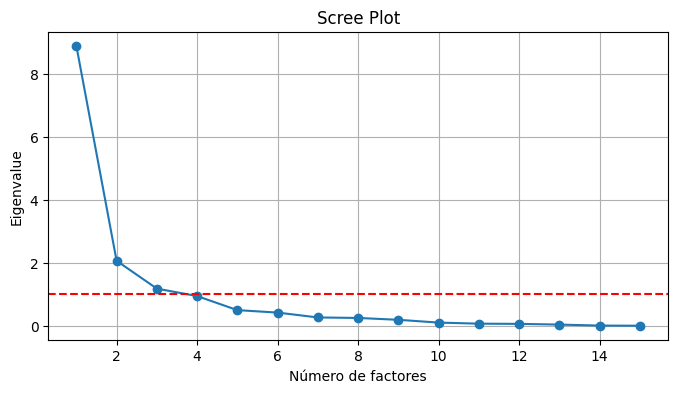

In [70]:
# 2. Determinar el número óptimo de factores usando eigenvalores
fa = FactorAnalyzer()
fa.fit(df)

# Valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Gráfica de codo (scree plot)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

Cargas factoriales:
                             Factor1  Factor2  Factor3
impo_planos_venezuela           0.59     0.36     0.41
02.01 LAMINA EN CALIENTE        0.78     0.25     0.41
PLANOS                          0.04     0.21     0.92
Carbón Mineral                 -0.56    -0.33     0.35
Planos de Acero al Silicio      0.34     0.52     0.38
Lámina con Recubrimiento        0.07     0.18     0.67
anglePerfilesComerciales        0.40     0.89     0.23
platePlacaDeHoja                0.18     0.93     0.28
expo_planos_ecuador             0.41     0.51    -0.01
HIERRO DE PRIMERA FUSIÓN       -0.84    -0.22     0.11
04.01 LAMINA GALVANIZADA        0.67     0.54     0.38
03.01 LAMINA EN FRIO            0.73     0.46     0.32
Arrabio                        -0.91    -0.25    -0.11
Planchón                        0.57     0.48     0.49
wBeamsPerfilesEstructurales     0.36     0.89     0.27


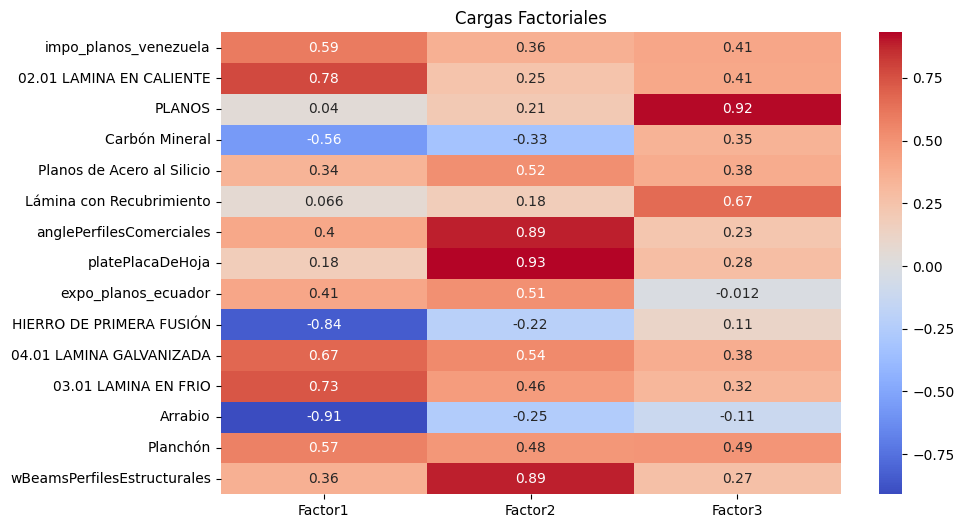

In [71]:
# 3. Ajuste del modelo con un número elegido de factores (por ejemplo, 3)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df)

# Carga factorial (factor loadings)
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f'Factor{i+1}' for i in range(3)])
print("Cargas factoriales:")
print(loadings.round(2))

# 4. Visualización de las cargas factoriales
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Cargas Factoriales")
plt.show()

Analizar alch esto de arriba , igual asi de rapido yo creo que del analisis se debreia quitar las planos y lamina con recubrimiento no? , bueno igual importante decidir que vamos  a hacer para saber eso